In [1]:
import os

os.chdir('C:/Users/EunJin/Desktop/논문 데이터')
os.getcwd()

'C:\\Users\\EunJin\\Desktop\\논문 데이터'

In [2]:
import pandas as pd

car_df1_cluster2 = pd.read_pickle('car_df1_cluster2.pkl')

In [3]:
len(car_df1_cluster2)

37032

In [10]:
car_df1_cluster2['link_id'].nunique()

8

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car_df1_cluster2.drop(['date','road_name','link_id','start_point','end_point','cluster','y'],axis = 1), car_df1_cluster2['y'], test_size=0.3, random_state=333)

In [5]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [6]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred) : 
    return np.sqrt(mean_squared_error(y_true, y_pred))

def model_cv_test(model, train_X, train_y, test_X, test_y, is_log) :

    train_rmse = []
    valid_rmse = []
    
    print('##### {} #####'.format(model.__class__.__name__))
        
    for i, (train_idx, val_idx) in enumerate(kf.split(train_X)):
        X_train, X_val = train_X.iloc[train_idx, :], train_X.iloc[val_idx, :]
        y_train, y_val = train_y[train_idx], train_y[val_idx]

        model.fit(X_train, y_train)
        
        if is_log :
            y_train = np.expm1(y_train)
            y_val = np.expm1(y_val)
            pred_train = np.expm1(model.predict(X_train))
            pred_valid = np.expm1(model.predict(X_val))
        else :
            pred_train = model.predict(X_train)
            pred_valid = model.predict(X_val)

        print('{0} fold train rmse : {1:.3f} valid rmse : {2:.3f}'.format(i, rmse(y_train, pred_train), rmse(y_val, pred_valid)))
        
        train_rmse.append(rmse(y_train, pred_train))
        valid_rmse.append(rmse(y_val, pred_valid))

    print('\n')    
    print('mean train rmse : {0:.3f} mean valid rmse : {1:.3f}'.format(np.mean(train_rmse), np.mean(valid_rmse)))

    
    model.fit(train_X, train_y)
    
    if is_log :
        test_y = np.expm1(test_y)
        pred_test = np.expm1(model.predict(test_X))
    else :
        pred_test = model.predict(test_X)
    
    print('test rmse {0:.3f} '.format(rmse(test_y, pred_test)))
    
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3, random_state = 333)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression()

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))

In [9]:
model_cv_test(lr, X_train, y_train, X_test, y_test, False)

##### LinearRegression #####
0 fold train rmse : 4.974 valid rmse : 4.944
1 fold train rmse : 4.977 valid rmse : 4.942
2 fold train rmse : 4.933 valid rmse : 5.030


mean train rmse : 4.961 mean valid rmse : 4.972
test rmse 4.946 


In [10]:
ridge = Ridge()
model_cv_test(ridge, X_train_sc, y_train, X_test_sc, y_test, False)

##### Ridge #####
0 fold train rmse : 4.974 valid rmse : 4.944
1 fold train rmse : 4.977 valid rmse : 4.942
2 fold train rmse : 4.933 valid rmse : 5.030


mean train rmse : 4.961 mean valid rmse : 4.972
test rmse 4.946 


In [11]:
lasso = Lasso()
model_cv_test(lasso, X_train_sc, y_train, X_test_sc, y_test, False)

##### Lasso #####
0 fold train rmse : 5.481 valid rmse : 5.430
1 fold train rmse : 5.475 valid rmse : 5.450
2 fold train rmse : 5.433 valid rmse : 5.511


mean train rmse : 5.463 mean valid rmse : 5.464
test rmse 5.432 


In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1)
#model_cv_test(rf, X_train, y_train, X_test, y_test, False)

In [13]:
model_cv_test(rf, X_train_sc, y_train, X_test_sc, y_test, False)

##### RandomForestRegressor #####


C:\Users\EunJin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0 fold train rmse : 1.289 valid rmse : 2.967
1 fold train rmse : 1.266 valid rmse : 2.961
2 fold train rmse : 1.260 valid rmse : 3.048


mean train rmse : 1.272 mean valid rmse : 2.992
test rmse 2.907 


In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [15]:
xgb = XGBRegressor(n_jobs = -1)
lgb = LGBMRegressor(n_jobs = -1)

In [16]:
model_cv_test(xgb, X_train_sc, y_train, X_test_sc, y_test, False)

##### XGBRegressor #####
0 fold train rmse : 3.442 valid rmse : 3.515
1 fold train rmse : 3.523 valid rmse : 3.497
2 fold train rmse : 3.426 valid rmse : 3.555


mean train rmse : 3.464 mean valid rmse : 3.523
test rmse 3.485 


In [17]:
model_cv_test(lgb, X_train_sc, y_train, X_test_sc, y_test, False)

##### LGBMRegressor #####
0 fold train rmse : 2.487 valid rmse : 2.842
1 fold train rmse : 2.510 valid rmse : 2.760
2 fold train rmse : 2.487 valid rmse : 2.856


mean train rmse : 2.495 mean valid rmse : 2.819
test rmse 2.793 


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

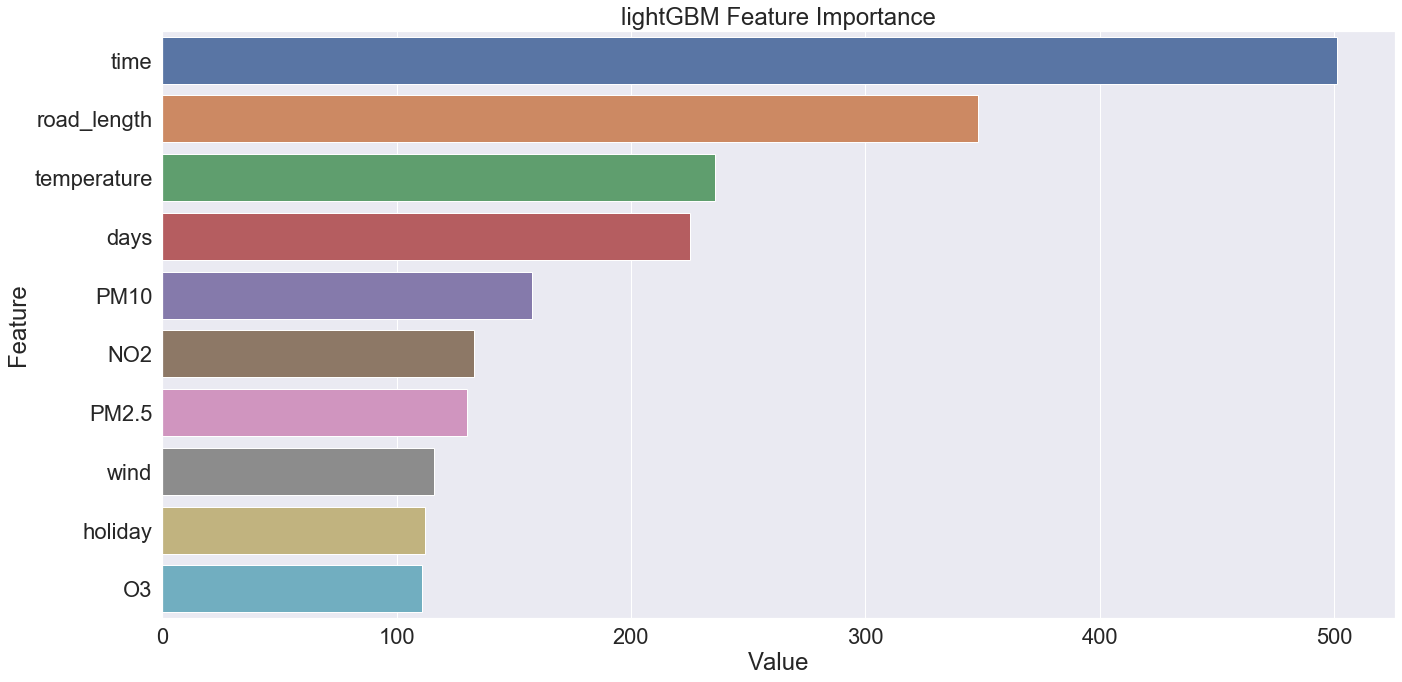

In [20]:
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:10])
plt.title('lightGBM Feature Importance')
plt.tight_layout()
plt.show()

## cluster2는 rmse 기준으로 lightGBM 선택

In [24]:
pd.set_option('display.max_columns', 500)
car_df1_cluster2.head(5)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,cluster,hsv,cctv_kids,cctv_length,kids_length,entrance_length,signal_length,cctv_num,kids_num,entrance_num,signal_num,severity_level,season,month_1,month_2,month_3,month_4,month_5,month_6,month_8,month_9,month_10,month_11,month_12,month
9098,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,0,22.09,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,0,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9099,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,1,21.18,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.9,1.7,0.0,0.0,1,0,0,0.005,0.5,0.020,0.023,31.0,16.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9100,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,2,20.84,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.4,1.3,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,30.0,17.0,0,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9101,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,3,17.09,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.5,1.3,0.0,0.0,1,0,0,0.004,0.4,0.030,0.011,24.0,13.0,0,0,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9102,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,4,17.56,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,1.0,1.9,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,31.0,17.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1


In [23]:
car_df1_cluster2.link_id.nunique()

8